In [218]:
import geopandas as gpd
import pandas as pd
import sys
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# repo_path = "/[yourpath]/nyc-primary-2025/"

sys.path.insert(0, repo_path + "/src")
sys.path.insert(0, repo_path + "/data")

In [73]:
gdfa = gpd.read_file(repo_path + "/data/nyed_25b/nyed.shp")
gdfc = gpd.read_file(repo_path + "/data/nycg_25b/nycg.shp")

In [74]:
gdfa.head()

,ElectDist,Shape_Leng,Shape_Area,geometry
0,23001,24593.971343,2.779129e+07,"POLYGON ((1006386.279 144120.655, 1006261.842 ..."
1,23002,15531.629161,9.753401e+06,"POLYGON ((1009207.47 145106.094, 1009147.042 1..."
2,23003,41787.652835,3.452959e+07,"POLYGON ((1022349.755 145817.949, 1022404.165 ..."
3,23004,13616.939280,8.166450e+06,"POLYGON ((1025161.154 147197.743, 1025055.81 1..."
4,23005,10698.547734,5.077745e+06,"POLYGON ((1026261.273 147727.118, 1026236.365 ..."


In [75]:
gdfa.columns

Index(['ElectDist', 'Shape_Leng', 'Shape_Area', 'geometry'], dtype='object')

In [76]:
gdfc.head()

,CongDist,Shape_Leng,Shape_Area,geometry
0,12,163511.646592,2.717811e+08,"MULTIPOLYGON (((994681.406 203127.675, 994780...."
1,3,175355.898511,3.759703e+08,"MULTIPOLYGON (((1054979.75 223171.476, 1055068..."
2,5,647229.809201,1.313440e+09,"MULTIPOLYGON (((1032452.015 154469.237, 103245..."
3,6,184913.080855,7.279196e+08,"POLYGON ((1051683.111 203936.814, 1051646.257 ..."
4,11,411597.755142,1.810285e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."


In [77]:
gdfc.columns

Index(['CongDist', 'Shape_Leng', 'Shape_Area', 'geometry'], dtype='object')

In [528]:
udf = gdfc.overlay(gdfa, how="union")
# intdf = udf.overlay(gdfc, how="intersection")


/Users/emilyschuch/.pyenv/versions/dsenv/lib/python3.12/site-packages/geopandas/tools/overlay.py:358: UserWarning:

`keep_geom_type=True` in overlay resulted in 6059 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries



In [529]:
udf.head()

,CongDist,Shape_Leng_1,Shape_Area_1,ElectDist,Shape_Leng_2,Shape_Area_2,geometry
0,12.0,163511.646592,2.717811e+08,36006.0,5890.737894,1.265910e+06,"POLYGON ((1002096.492 220514.18, 1002096.492 2..."
1,14.0,645612.384001,8.234583e+08,36006.0,5890.737894,1.265910e+06,"POLYGON ((1002384.94 220244.057, 1002410.357 2..."
2,12.0,163511.646592,2.717811e+08,37006.0,3459.514393,7.098316e+05,"POLYGON ((996020.662 211906.695, 996020.661 21..."
3,7.0,265598.462504,6.125646e+08,37006.0,3459.514393,7.098316e+05,"POLYGON ((995672.07 211270.083, 995688.043 211..."
4,12.0,163511.646592,2.717811e+08,37066.0,945.678923,9.463212e+03,"POLYGON ((995176.359 210349.162, 995176.359 21..."


In [530]:
intdf = gpd.sjoin(udf, gdfc, how="left")

In [531]:
intdf.head()

,CongDist_left,Shape_Leng_1,Shape_Area_1,ElectDist,Shape_Leng_2,Shape_Area_2,geometry,index_right,CongDist_right,Shape_Leng,Shape_Area
0,12.0,163511.646592,2.717811e+08,36006.0,5890.737894,1.265910e+06,"POLYGON ((1002096.492 220514.18, 1002096.492 2...",0.0,12.0,163511.646592,2.717811e+08
0,12.0,163511.646592,2.717811e+08,36006.0,5890.737894,1.265910e+06,"POLYGON ((1002096.492 220514.18, 1002096.492 2...",10.0,14.0,645612.384001,8.234583e+08
1,14.0,645612.384001,8.234583e+08,36006.0,5890.737894,1.265910e+06,"POLYGON ((1002384.94 220244.057, 1002410.357 2...",10.0,14.0,645612.384001,8.234583e+08
2,12.0,163511.646592,2.717811e+08,37006.0,3459.514393,7.098316e+05,"POLYGON ((996020.662 211906.695, 996020.661 21...",11.0,7.0,265598.462504,6.125646e+08
2,12.0,163511.646592,2.717811e+08,37006.0,3459.514393,7.098316e+05,"POLYGON ((996020.662 211906.695, 996020.661 21...",0.0,12.0,163511.646592,2.717811e+08


In [532]:
intdf.columns

Index(['CongDist_left', 'Shape_Leng_1', 'Shape_Area_1', 'ElectDist',
       'Shape_Leng_2', 'Shape_Area_2', 'geometry', 'index_right',
       'CongDist_right', 'Shape_Leng', 'Shape_Area'],
      dtype='object')

In [533]:
gdfc.shape

(13, 4)

In [534]:
gdfa.shape

(4264, 4)

In [535]:
udf.shape

(5484, 7)

In [536]:
intdf.shape

(7165, 11)

In [537]:
dups = intdf[intdf['ElectDist'].duplicated()]

In [538]:
dups.sort_values(by="ElectDist").head(20)

,CongDist_left,Shape_Leng_1,Shape_Area_1,ElectDist,Shape_Leng_2,Shape_Area_2,geometry,index_right,CongDist_right,Shape_Leng,Shape_Area
4777,NaN,NaN,NaN,23001.0,24593.971343,2.779129e+07,"MULTIPOLYGON (((1002570.335 137904.22, 1002529...",2.0,5.0,647229.809201,1.313440e+09
4778,NaN,NaN,NaN,23002.0,15531.629161,9.753401e+06,"MULTIPOLYGON (((1009207.47 145106.094, 1009207...",2.0,5.0,647229.809201,1.313440e+09
4779,NaN,NaN,NaN,23003.0,41787.652835,3.452959e+07,"MULTIPOLYGON (((1022401.343 145699.655, 102239...",2.0,5.0,647229.809201,1.313440e+09
4780,NaN,NaN,NaN,23004.0,13616.939280,8.166450e+06,"MULTIPOLYGON (((1024929.717 147101.194, 102486...",2.0,5.0,647229.809201,1.313440e+09
4781,NaN,NaN,NaN,23005.0,10698.547734,5.077745e+06,"MULTIPOLYGON (((1026236.365 147712.814, 102621...",2.0,5.0,647229.809201,1.313440e+09
4782,NaN,NaN,NaN,23006.0,9623.944445,4.381563e+06,"MULTIPOLYGON (((1026756.364 147970.595, 102675...",2.0,5.0,647229.809201,1.313440e+09
4783,NaN,NaN,NaN,23007.0,8943.399093,4.008091e+06,"MULTIPOLYGON (((1028314.084 148701.827, 102831...",2.0,5.0,647229.809201,1.313440e+09
4784,NaN,NaN,NaN,23008.0,9227.253614,3.228736e+06,"MULTIPOLYGON (((1029519.918 149274.46, 1029500...",2.0,5.0,647229.809201,1.313440e+09
4785,NaN,NaN,NaN,23009.0,9785.907234,5.387616e+06,"MULTIPOLYGON (((1031622.776 150198.874, 103167...",2.0,5.0,647229.809201,1.313440e+09
4786,NaN,NaN,NaN,23010.0,9732.741274,4.133088e+06,"MULTIPOLYGON (((1033708.046 151063.007, 103367...",2.0,5.0,647229.809201,1.313440e+09


In [539]:
dups[dups.CongDist_left > 0]

,CongDist_left,Shape_Leng_1,Shape_Area_1,ElectDist,Shape_Leng_2,Shape_Area_2,geometry,index_right,CongDist_right,Shape_Leng,Shape_Area
0,12.0,163511.646592,2.717811e+08,36006.0,5890.737894,1.265910e+06,"POLYGON ((1002096.492 220514.18, 1002096.492 2...",10.0,14.0,645612.384001,8.234583e+08
1,14.0,645612.384001,8.234583e+08,36006.0,5890.737894,1.265910e+06,"POLYGON ((1002384.94 220244.057, 1002410.357 2...",10.0,14.0,645612.384001,8.234583e+08
2,12.0,163511.646592,2.717811e+08,37006.0,3459.514393,7.098316e+05,"POLYGON ((996020.662 211906.695, 996020.661 21...",0.0,12.0,163511.646592,2.717811e+08
3,7.0,265598.462504,6.125646e+08,37006.0,3459.514393,7.098316e+05,"POLYGON ((995672.07 211270.083, 995688.043 211...",11.0,7.0,265598.462504,6.125646e+08
3,7.0,265598.462504,6.125646e+08,37006.0,3459.514393,7.098316e+05,"POLYGON ((995672.07 211270.083, 995688.043 211...",0.0,12.0,163511.646592,2.717811e+08
...,...,...,...,...,...,...,...,...,...,...,...
4775,7.0,265598.462504,6.125646e+08,NaN,NaN,NaN,"MULTIPOLYGON (((992296.993 194254.375, 992282....",11.0,7.0,265598.462504,6.125646e+08
4776,8.0,582961.654434,7.412044e+08,NaN,NaN,NaN,"MULTIPOLYGON (((1030235.969 160752.433, 103021...",4.0,11.0,411597.755142,1.810285e+09
4776,8.0,582961.654434,7.412044e+08,NaN,NaN,NaN,"MULTIPOLYGON (((1030235.969 160752.433, 103021...",12.0,8.0,582961.654434,7.412044e+08
4776,8.0,582961.654434,7.412044e+08,NaN,NaN,NaN,"MULTIPOLYGON (((1030235.969 160752.433, 103021...",11.0,7.0,265598.462504,6.125646e+08


In [540]:
dups[dups.CongDist_right > 0]

,CongDist_left,Shape_Leng_1,Shape_Area_1,ElectDist,Shape_Leng_2,Shape_Area_2,geometry,index_right,CongDist_right,Shape_Leng,Shape_Area
0,12.0,163511.646592,2.717811e+08,36006.0,5890.737894,1.265910e+06,"POLYGON ((1002096.492 220514.18, 1002096.492 2...",10.0,14.0,645612.384001,8.234583e+08
1,14.0,645612.384001,8.234583e+08,36006.0,5890.737894,1.265910e+06,"POLYGON ((1002384.94 220244.057, 1002410.357 2...",10.0,14.0,645612.384001,8.234583e+08
2,12.0,163511.646592,2.717811e+08,37006.0,3459.514393,7.098316e+05,"POLYGON ((996020.662 211906.695, 996020.661 21...",0.0,12.0,163511.646592,2.717811e+08
3,7.0,265598.462504,6.125646e+08,37006.0,3459.514393,7.098316e+05,"POLYGON ((995672.07 211270.083, 995688.043 211...",11.0,7.0,265598.462504,6.125646e+08
3,7.0,265598.462504,6.125646e+08,37006.0,3459.514393,7.098316e+05,"POLYGON ((995672.07 211270.083, 995688.043 211...",0.0,12.0,163511.646592,2.717811e+08
...,...,...,...,...,...,...,...,...,...,...,...
5479,NaN,NaN,NaN,61105.0,940.705757,1.503510e+04,"POLYGON ((977523.727 176502.81, 977173.845 176...",6.0,10.0,307224.742275,4.303643e+08
5480,NaN,NaN,NaN,61106.0,1904.339654,5.106081e+04,"MULTIPOLYGON (((977944.543 176562.376, 977250....",6.0,10.0,307224.742275,4.303643e+08
5481,NaN,NaN,NaN,61107.0,990.594485,1.535676e+04,"MULTIPOLYGON (((978427.661 176511.068, 978349....",6.0,10.0,307224.742275,4.303643e+08
5482,NaN,NaN,NaN,61108.0,218.255154,1.588598e+03,"MULTIPOLYGON (((978354.402 176393.827, 978346....",6.0,10.0,307224.742275,4.303643e+08


/var/folders/97/_bpy961n2hq12htctyl45qsw0000gn/T/ipykernel_77964/3872048903.py:2: UserWarning:

Only specify one of 'column' or 'color'. Using 'color'.



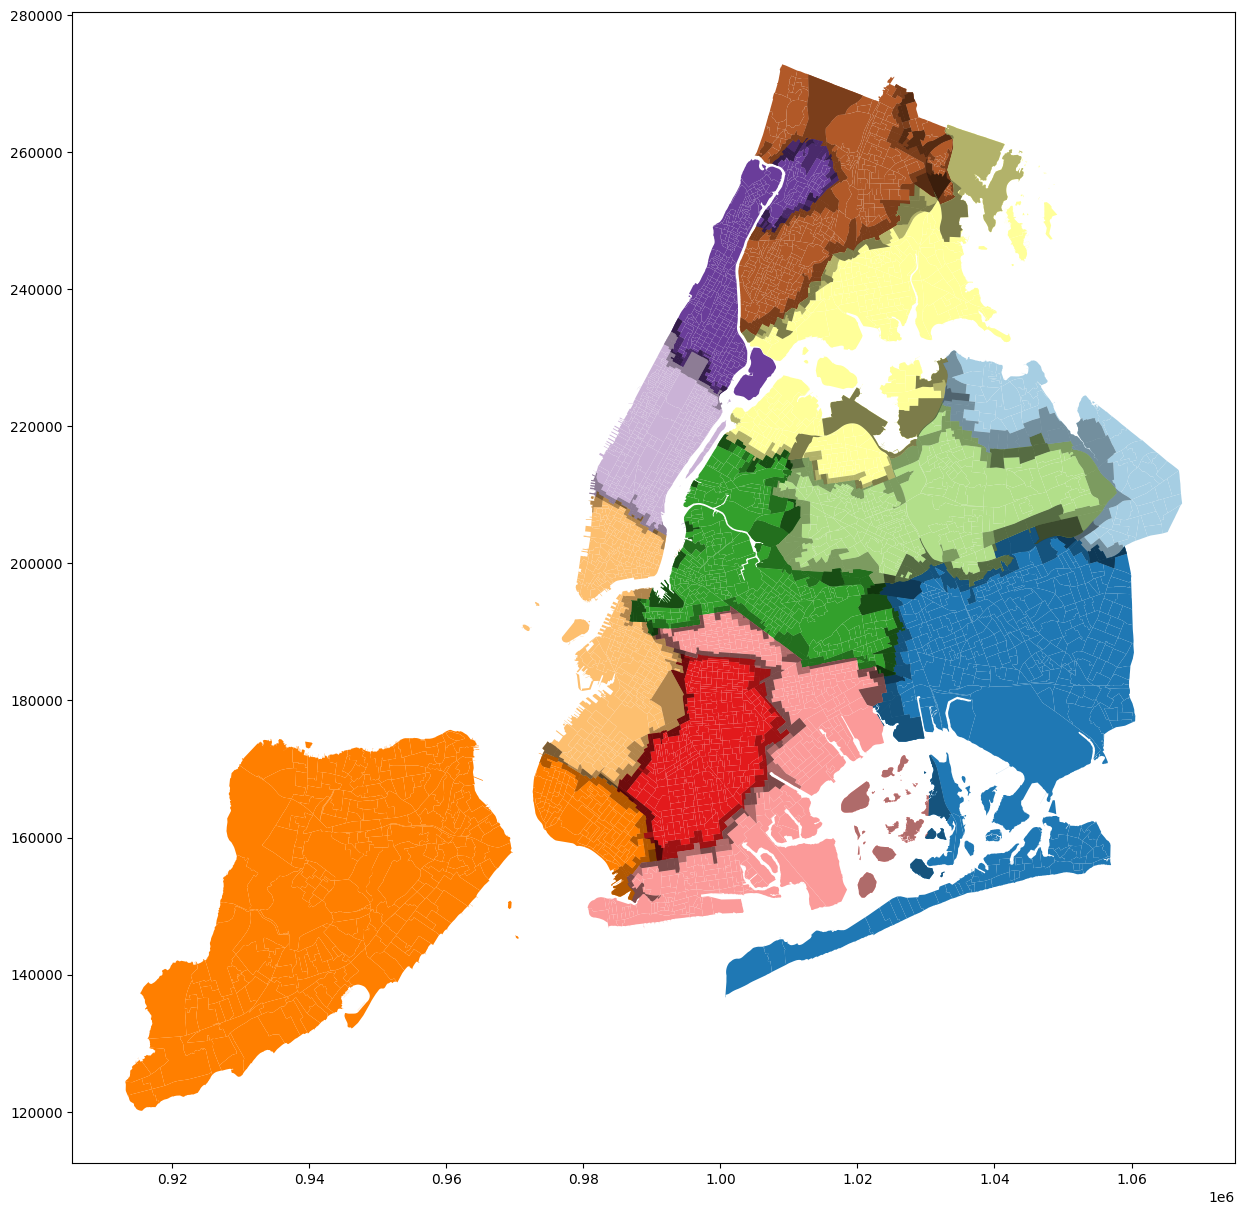

In [542]:
cdf = intdf.plot(figsize=(15,15), column="CongDist_left", cmap="Paired")
dups.plot(ax=cdf, column="ElectDist", color="black", alpha=0.3)
plt.show()

In [587]:
intdf_z = intdf.dissolve(by=['ElectDist', "CongDist_left"], aggfunc='first').reset_index()

In [588]:
intdf_z.head()

,ElectDist,CongDist_left,geometry,Shape_Leng_1,Shape_Area_1,Shape_Leng_2,Shape_Area_2,index_right,CongDist_right,Shape_Leng,Shape_Area
0,23001.0,5.0,"POLYGON ((1002570.335 137904.22, 1002529.989 1...",647229.809201,1.313440e+09,24593.971343,2.779129e+07,2.0,5.0,647229.809201,1.313440e+09
1,23002.0,5.0,"POLYGON ((1006386.279 144120.655, 1006428.622 ...",647229.809201,1.313440e+09,15531.629161,9.753401e+06,2.0,5.0,647229.809201,1.313440e+09
2,23003.0,5.0,"POLYGON ((1022401.343 145699.655, 1022399.71 1...",647229.809201,1.313440e+09,41787.652835,3.452959e+07,2.0,5.0,647229.809201,1.313440e+09
3,23004.0,5.0,"POLYGON ((1024929.717 147101.194, 1024864.058 ...",647229.809201,1.313440e+09,13616.939280,8.166450e+06,2.0,5.0,647229.809201,1.313440e+09
4,23005.0,5.0,"POLYGON ((1026236.365 147712.814, 1026213.652 ...",647229.809201,1.313440e+09,10698.547734,5.077745e+06,2.0,5.0,647229.809201,1.313440e+09


In [589]:
intdf_z.shape

(4764, 11)

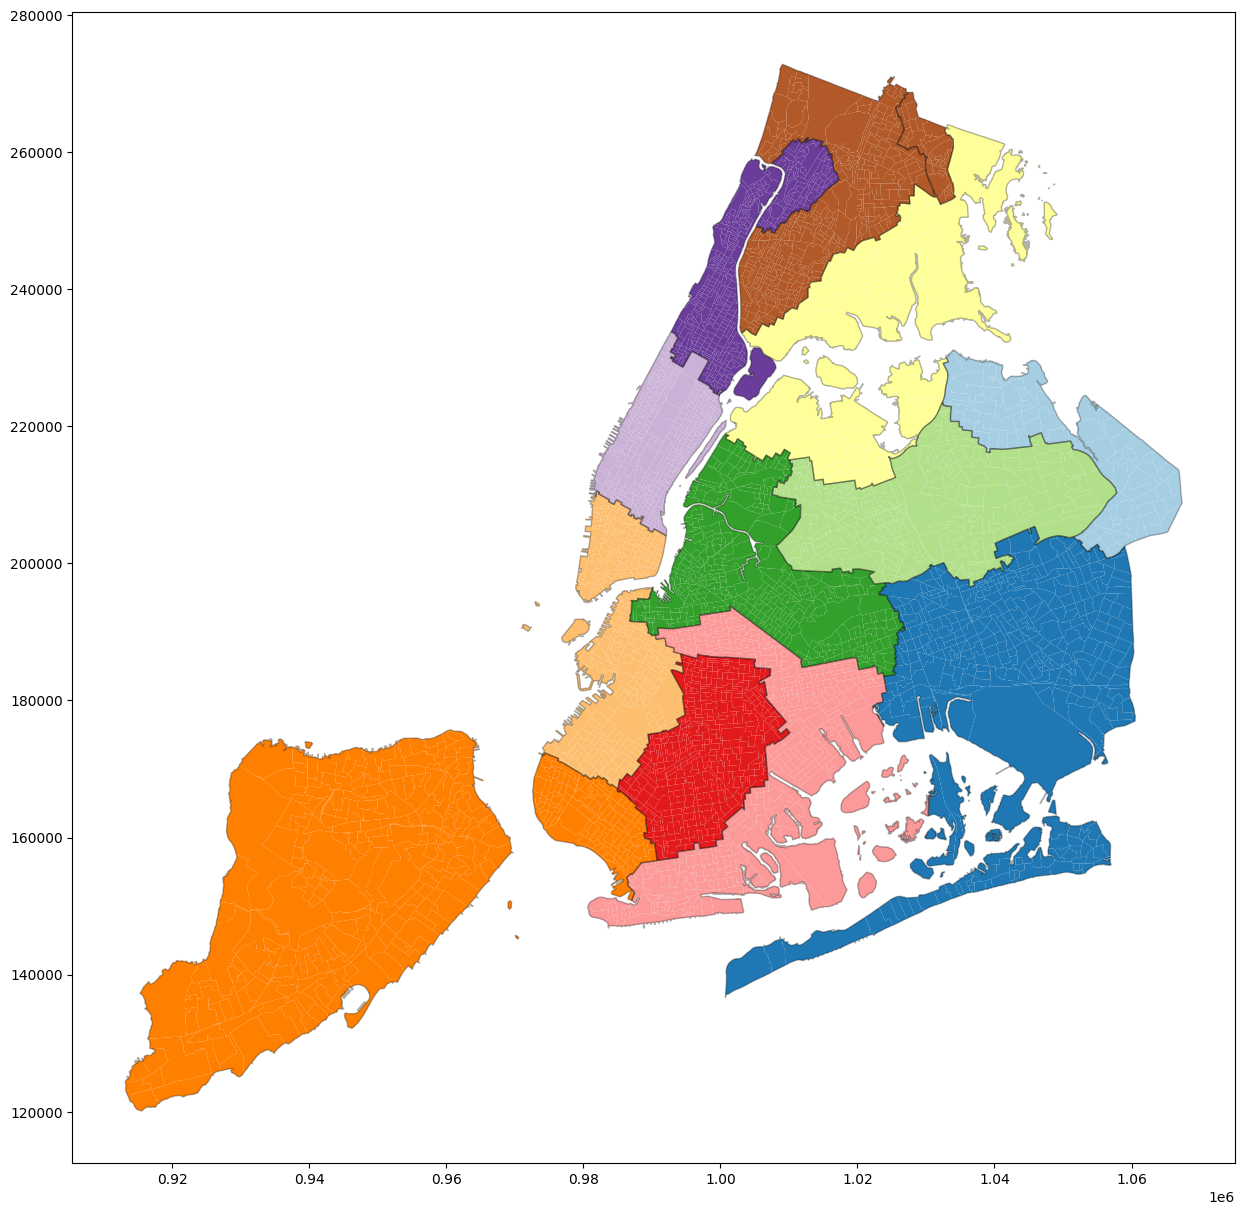

In [604]:
cdf = intdf_z.plot(figsize=(15,15), column="CongDist_left", cmap="Paired")
gdfc.plot(ax=cdf, color="none", edgecolor='black', alpha=0.3)
plt.show()

In [623]:
dups2 = intdf_z[intdf_z['ElectDist'].duplicated()]

In [626]:
dups2.sort_values(by="ElectDist")

,ElectDist,CongDist_left,geometry,Shape_Leng_1,Shape_Area_1,Shape_Leng_2,Shape_Area_2,index_right,CongDist_right,Shape_Leng,Shape_Area
33,23033.0,8.0,"POLYGON ((1023120.414 177519.094, 1023092.429 ...",582961.654434,7.412044e+08,28474.195783,1.796672e+07,12.0,8.0,582961.654434,7.412044e+08
36,23035.0,8.0,"MULTIPOLYGON (((1022213.834 179133.921, 102260...",582961.654434,7.412044e+08,20936.076483,7.301724e+06,12.0,8.0,582961.654434,7.412044e+08
48,23046.0,7.0,"MULTIPOLYGON (((1025552.413 183825.593, 102559...",265598.462504,6.125646e+08,9890.610916,4.169993e+06,11.0,7.0,265598.462504,6.125646e+08
50,23047.0,8.0,"POLYGON ((1024167.609 181152.477, 1024287.56 1...",582961.654434,7.412044e+08,6476.181489,2.095131e+06,12.0,8.0,582961.654434,7.412044e+08
52,23048.0,8.0,"POLYGON ((1024287.56 181174.202, 1024287.56 18...",582961.654434,7.412044e+08,7245.406173,2.514064e+06,12.0,8.0,582961.654434,7.412044e+08
...,...,...,...,...,...,...,...,...,...,...,...
4711,87007.0,15.0,"POLYGON ((1018308.802 245611.224, 1018176.714 ...",172618.764403,5.189288e+08,5011.989871,1.253905e+06,10.0,14.0,645612.384001,8.234583e+08
4738,87033.0,15.0,"POLYGON ((1019602.819 245936.463, 1019602.819 ...",172618.764403,5.189288e+08,3932.761020,7.325009e+05,10.0,14.0,645612.384001,8.234583e+08
4741,87035.0,15.0,"MULTIPOLYGON (((1016712.654 245183.819, 101665...",172618.764403,5.189288e+08,8677.671205,3.038345e+06,10.0,14.0,645612.384001,8.234583e+08
4743,87036.0,15.0,"POLYGON ((1019440.543 245652.842, 1019542.907 ...",172618.764403,5.189288e+08,2743.543732,2.247119e+05,10.0,14.0,645612.384001,8.234583e+08


In [633]:
# intdf_z.groupby(["ElectDist", "CongDist_left", "geometry"]).agg()

/var/folders/97/_bpy961n2hq12htctyl45qsw0000gn/T/ipykernel_77964/3805346156.py:2: UserWarning:

Only specify one of 'column' or 'color'. Using 'color'.



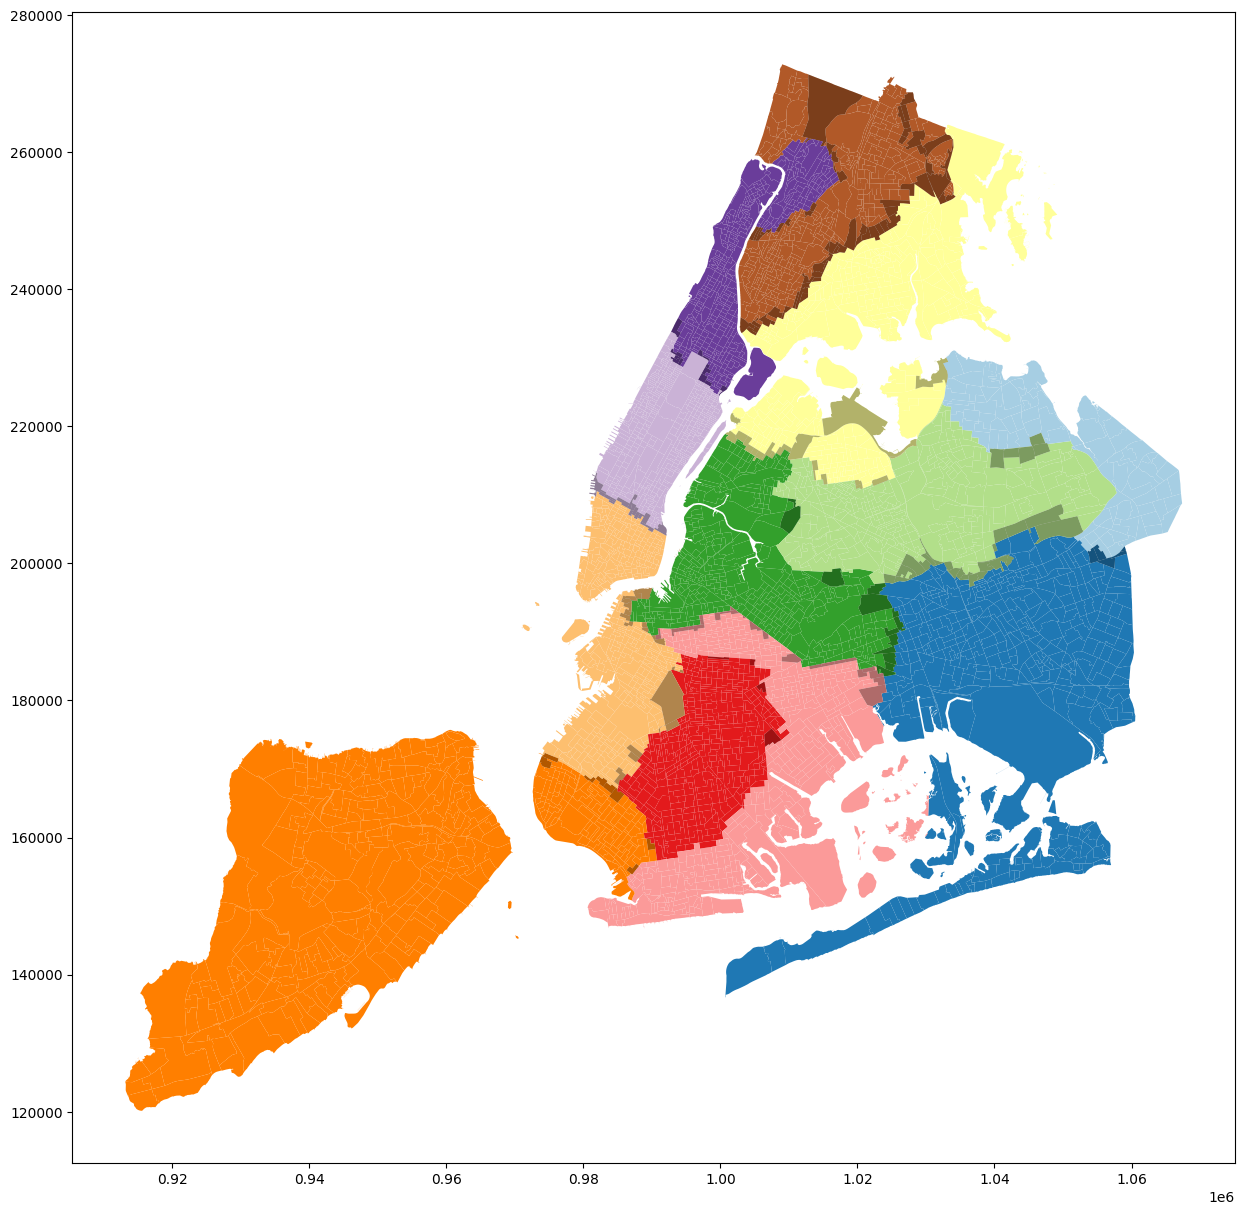

In [624]:
cdf = intdf_z.plot(figsize=(15,15), column="CongDist_left", cmap="Paired")
dups2.plot(ax=cdf, column="ElectDist", color="black", alpha=0.3)
plt.show()

In [609]:
intdf_z.columns

Index(['ElectDist', 'CongDist_left', 'geometry', 'Shape_Leng_1',
       'Shape_Area_1', 'Shape_Leng_2', 'Shape_Area_2', 'index_right',
       'CongDist_right', 'Shape_Leng', 'Shape_Area'],
      dtype='object')

In [627]:
intdf_a = intdf_z[["ElectDist", "CongDist_left", "geometry"]]

In [634]:
intdf_a = intdf_a.dissolve(by=['ElectDist'], aggfunc='last').reset_index()

In [635]:
intdf_a

,ElectDist,geometry,CongDist_left
0,23001.0,"POLYGON ((1002570.335 137904.22, 1002529.989 1...",5.0
1,23002.0,"POLYGON ((1006386.279 144120.655, 1006428.622 ...",5.0
2,23003.0,"POLYGON ((1022401.343 145699.655, 1022399.71 1...",5.0
3,23004.0,"POLYGON ((1024929.717 147101.194, 1024864.058 ...",5.0
4,23005.0,"POLYGON ((1026236.365 147712.814, 1026213.652 ...",5.0
...,...,...,...
4259,87051.0,"POLYGON ((1028537.299 238765.955, 1028537.299 ...",14.0
4260,87052.0,"POLYGON ((1026700.314 236979.574, 1026448.914 ...",14.0
4261,87053.0,"POLYGON ((1016600.548 247921.642, 1016493.858 ...",15.0
4262,87054.0,"POLYGON ((1019332.481 244558.282, 1019315.605 ...",14.0


In [640]:
intdf_z["geometry"] = intdf_z.normalize()
intdf_z = intdf_z.drop_duplicates()

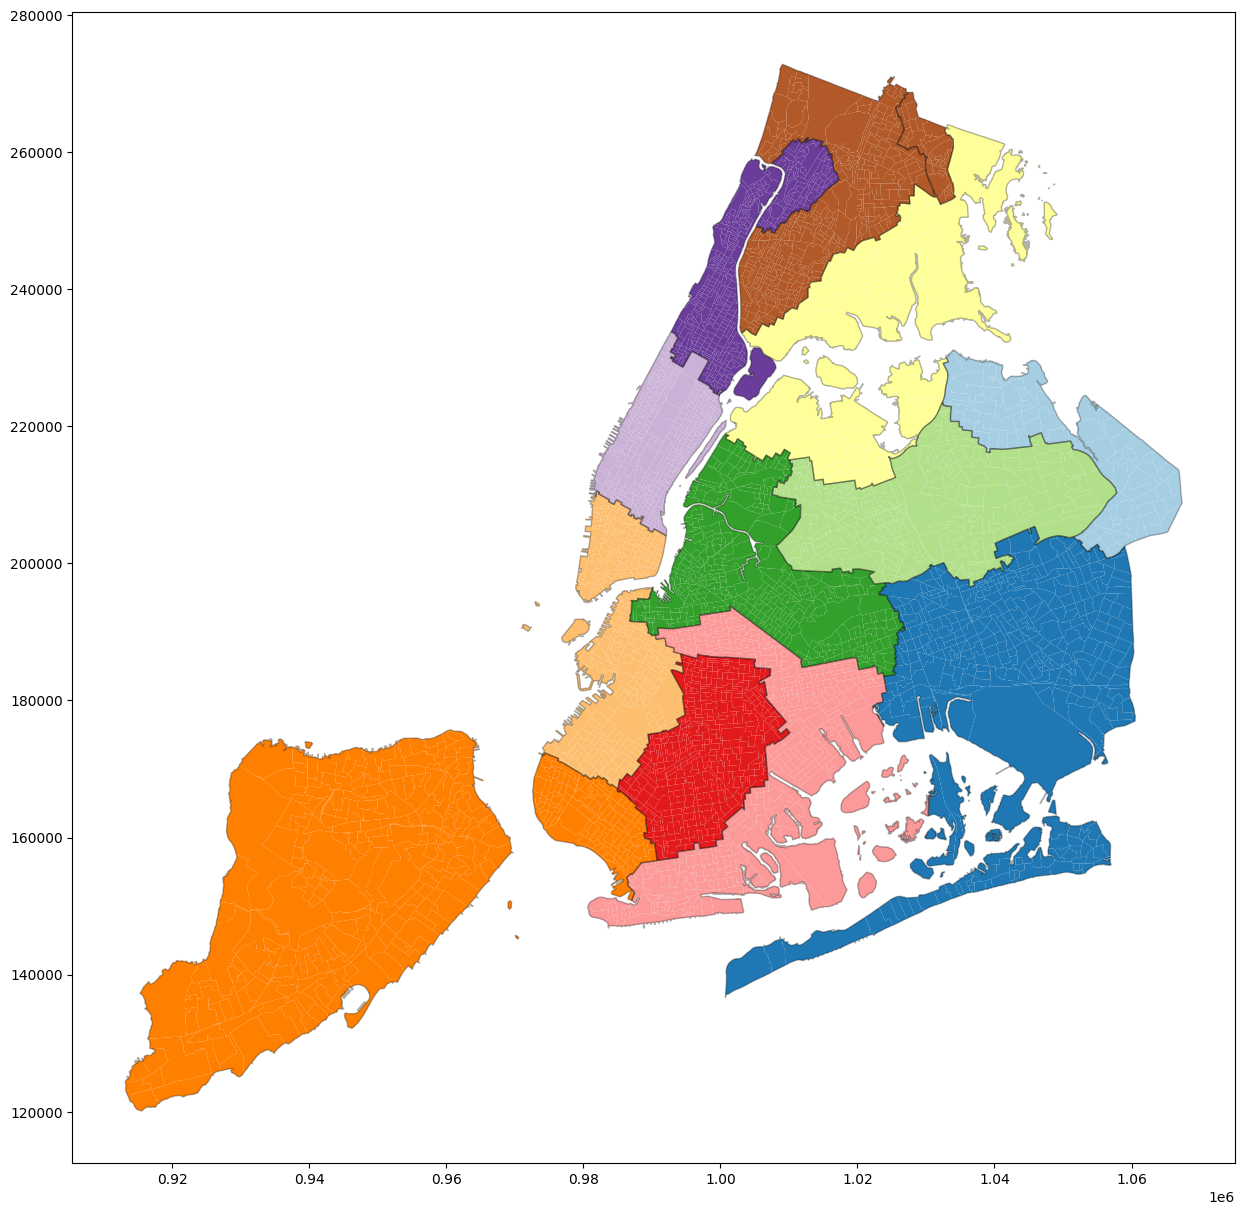

In [641]:
cdf = intdf_z.plot(figsize=(15,15), column="CongDist_left", cmap="Paired")
gdfc.plot(ax=cdf, color="none", edgecolor='black', alpha=0.3)
plt.show()

/var/folders/97/_bpy961n2hq12htctyl45qsw0000gn/T/ipykernel_77964/529188231.py:4: UserWarning:

Only specify one of 'column' or 'color'. Using 'color'.



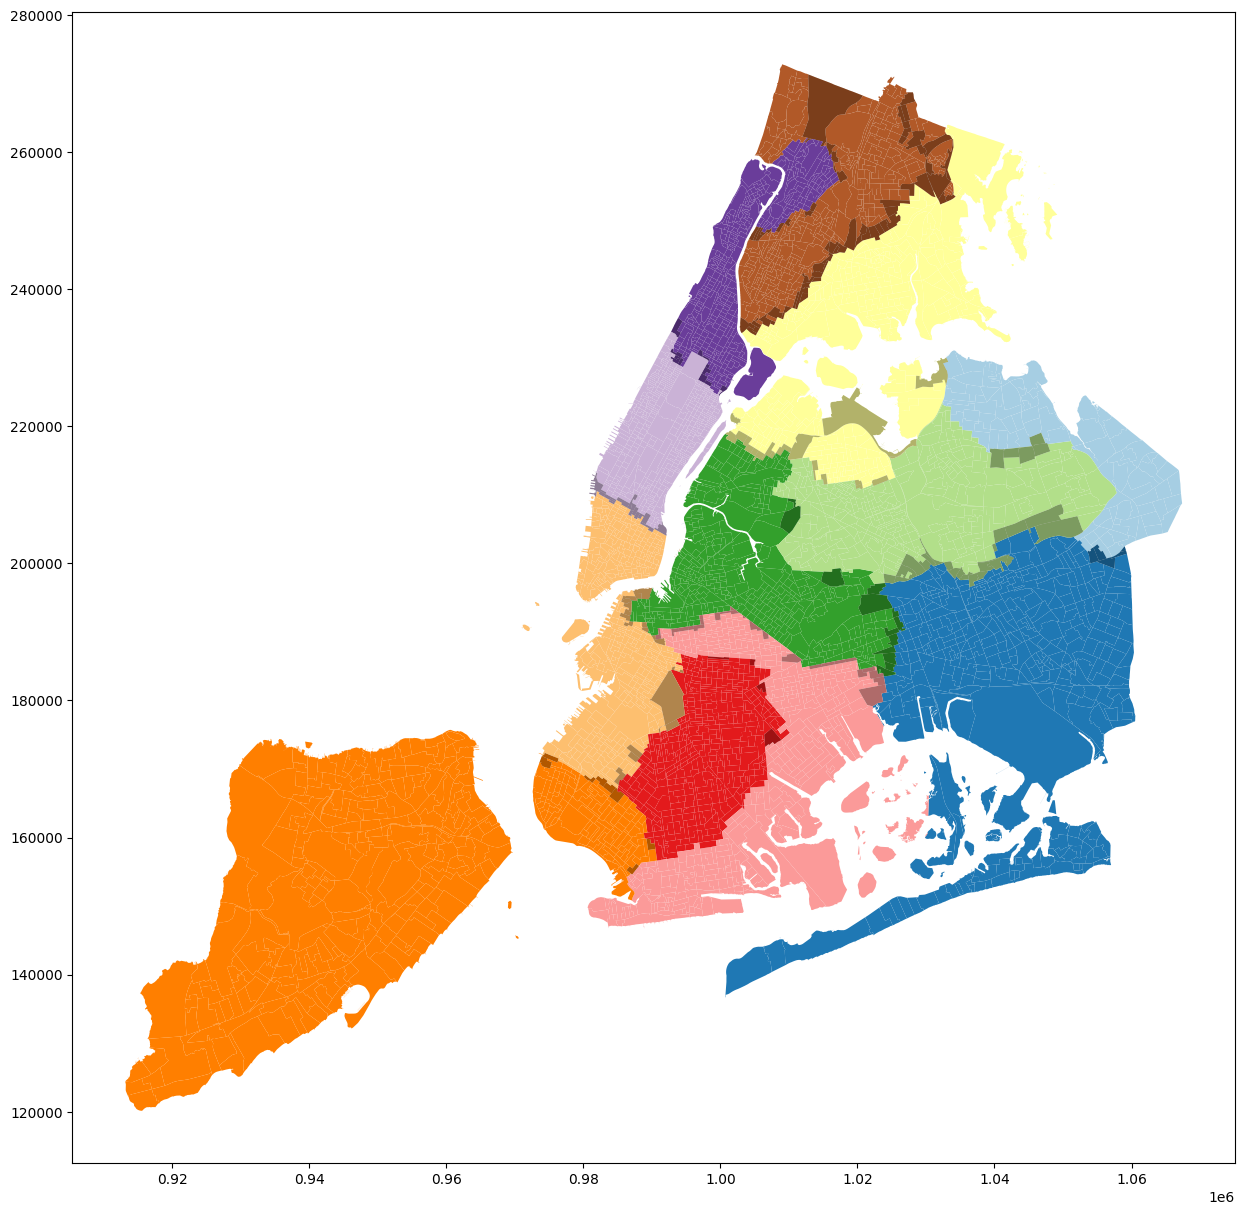

In [642]:
dups2 = intdf_z[intdf_z['ElectDist'].duplicated()]

cdf = intdf_z.plot(figsize=(15,15), column="CongDist_left", cmap="Paired")
dups2.plot(ax=cdf, column="ElectDist", color="black", alpha=0.3)
plt.show()

In [181]:
# borough_map = {
#     "1": "Manhattan",
#     "2": "Bronx",
#     "3": "Brooklyn",
#     "4": "Queens",
#     "5": "Staten Island"
# }  

In [182]:
# intdf["borough_name"] = intdf["BOROUGH"].map(lambda x: borough_map[x])

In [183]:
# intdf[intdf["CongDist"] == 10].groupby("borough_name").count()

In [667]:
dist = intdf_z[["ElectDist", "CongDist_left"]]

In [668]:
dist.shape

(4764, 2)

In [672]:
dist = dist.groupby("ElectDist")["CongDist_left"].agg("first").reset_index()

In [673]:
vdf = pd.read_csv(repo_path + "/data/votes.csv")

In [674]:
vdf.head()

,AD,election_district,pct_reported,zohran_kwame_mamdani,scott_m_stringer,selma_k_bartholomew,zellnor_myrie,adrienne_e_adams,andrew_m_cuomo,jessica_ramos,whitney_r_tilson,michael_blake,brad_lander,paperboy_love_prince,write_in
0,AD37-1,ED 71,80.0,0,0,0,0,0,0,0,0,0,0,0,0
1,AD61-1,ED 60,99.0,141,6,0,5,11,75,1,3,0,53,0,1
2,AD61-1,ED 61,99.0,148,9,0,6,11,175,4,16,1,70,0,0
3,AD61-1,ED 62,99.0,106,14,0,3,6,141,1,5,1,64,0,1
4,AD61-1,ED 63,99.0,118,20,0,7,10,166,0,13,1,71,0,0


In [675]:
# intdf["prec_id"] = intdf[["ASSEMDIST", "ELECTDIST"]].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
dist["prec_id"] = dist["ElectDist"].map(lambda x: str(round(x)))

In [676]:
vdf["ASSEMDIST"] = vdf["AD"].map(lambda x: x.split("-")[0].replace("AD", ""))

In [677]:
vdf["ELECTDIST"] = vdf["election_district"].map(lambda x: x.replace("ED ", "").zfill(3))

In [678]:
vdf["prec_id"] = vdf[["ASSEMDIST", "ELECTDIST"]].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

In [679]:
len(set(vdf.prec_id))

4338

In [680]:
len(set(intdf_z.ElectDist))

4264

In [651]:
intdf_z.shape

(4764, 12)

In [693]:
votes = pd.merge(vdf, dist, how="left", on="prec_id")

In [694]:
votes.head()

,AD,election_district,pct_reported,zohran_kwame_mamdani,scott_m_stringer,selma_k_bartholomew,zellnor_myrie,adrienne_e_adams,andrew_m_cuomo,jessica_ramos,whitney_r_tilson,michael_blake,brad_lander,paperboy_love_prince,write_in,ASSEMDIST,ELECTDIST,prec_id,ElectDist,CongDist_left
0,AD37-1,ED 71,80.0,0,0,0,0,0,0,0,0,0,0,0,0,37,071,37071,37071.0,7.0
1,AD61-1,ED 60,99.0,141,6,0,5,11,75,1,3,0,53,0,1,61,060,61060,61060.0,10.0
2,AD61-1,ED 61,99.0,148,9,0,6,11,175,4,16,1,70,0,0,61,061,61061,61061.0,10.0
3,AD61-1,ED 62,99.0,106,14,0,3,6,141,1,5,1,64,0,1,61,062,61062,61062.0,10.0
4,AD61-1,ED 63,99.0,118,20,0,7,10,166,0,13,1,71,0,0,61,063,61063,61063.0,10.0


In [695]:
votes.describe()

,pct_reported,zohran_kwame_mamdani,scott_m_stringer,selma_k_bartholomew,zellnor_myrie,adrienne_e_adams,andrew_m_cuomo,jessica_ramos,whitney_r_tilson,michael_blake,brad_lander,paperboy_love_prince,write_in,ElectDist,CongDist_left
count,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4264.000000,4264.000000
mean,96.544908,99.655371,3.777547,0.306132,2.275242,9.440526,83.411710,0.890272,1.804518,0.920240,25.898801,0.326648,0.326187,55179.733818,9.730769
std,8.520912,95.702391,4.642446,0.661441,3.393131,9.859904,61.484774,1.223640,3.122591,1.355813,43.460589,0.651374,0.750904,18494.774242,3.275773
min,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23001.000000,3.000000
25%,99.000000,35.000000,1.000000,0.000000,0.000000,3.000000,43.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,39039.750000,7.000000
50%,99.000000,67.000000,2.000000,0.000000,1.000000,7.000000,73.000000,1.000000,1.000000,0.000000,6.000000,0.000000,0.000000,56017.500000,10.000000
75%,99.000000,136.000000,5.000000,0.000000,3.000000,13.000000,112.000000,1.000000,2.000000,1.000000,30.000000,0.000000,0.000000,71008.250000,13.000000
max,99.000000,645.000000,37.000000,13.000000,38.000000,106.000000,533.000000,14.000000,30.000000,24.000000,332.000000,7.000000,13.000000,87055.000000,16.000000


In [696]:
votes.columns

Index(['AD', 'election_district', 'pct_reported', 'zohran_kwame_mamdani',
       'scott_m_stringer', 'selma_k_bartholomew', 'zellnor_myrie',
       'adrienne_e_adams', 'andrew_m_cuomo', 'jessica_ramos',
       'whitney_r_tilson', 'michael_blake', 'brad_lander',
       'paperboy_love_prince', 'write_in', 'ASSEMDIST', 'ELECTDIST', 'prec_id',
       'ElectDist', 'CongDist_left'],
      dtype='object')

In [697]:
candidates = ['zohran_kwame_mamdani',
       'scott_m_stringer', 'selma_k_bartholomew', 'zellnor_myrie',
       'adrienne_e_adams', 'andrew_m_cuomo', 'jessica_ramos',
       'whitney_r_tilson', 'michael_blake', 'brad_lander',
       'paperboy_love_prince', 'write_in']


votes["total"] = votes[candidates].apply(lambda row: sum(row), axis=1)

In [698]:
votes.groupby("CongDist_left").agg(
    mamdani=("zohran_kwame_mamdani", sum),
    lander=("brad_lander", sum),
    cuomo=("andrew_m_cuomo", sum)
)

/var/folders/97/_bpy961n2hq12htctyl45qsw0000gn/T/ipykernel_77964/2051281298.py:1: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



,mamdani,lander,cuomo
CongDist_left,,,
3.0,7387,1374,8947
5.0,23490,2019,35816
6.0,21984,3412,22175
7.0,75143,12371,24368
8.0,34278,4689,29869
9.0,44039,7312,46302
10.0,64342,31844,32368
11.0,18528,3271,18758
12.0,49995,31477,56747


In [710]:
cong = votes.groupby("CongDist_left").agg(
        mamdani=("zohran_kwame_mamdani", sum),
        lander=("brad_lander", sum),
        cuomo=("andrew_m_cuomo", sum),
        total=("total", sum)
        ).reset_index()

/var/folders/97/_bpy961n2hq12htctyl45qsw0000gn/T/ipykernel_77964/1459774216.py:1: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



In [711]:
votes.total.sum()

993546

In [712]:
cong

,CongDist_left,mamdani,lander,cuomo,total
0,3.0,7387,1374,8947,19314
1,5.0,23490,2019,35816,70240
2,6.0,21984,3412,22175,51708
3,7.0,75143,12371,24368,118648
4,8.0,34278,4689,29869,76528
5,9.0,44039,7312,46302,105905
6,10.0,64342,31844,32368,139503
7,11.0,18528,3271,18758,44674
8,12.0,49995,31477,56747,152971
9,13.0,42258,8370,31024,90381


In [713]:
cong["progressive"] = cong["mamdani"] + cong["lander"]
cong["else"] = cong["total"] - cong["mamdani"] - cong["lander"] - cong["cuomo"]

In [717]:
for cand in "mamdani", "lander", "cuomo", "progressive", "else":
    cong["pct_" + cand] = cong[cand] / cong["total"]

cong["pct_diff_progressive"] = cong["pct_progressive"] - cong["pct_cuomo"]
cong["pct_diff_mamdani"] = cong["pct_mamdani"] - cong["pct_cuomo"]

In [718]:
cong.sort_values(by="pct_diff_mamdani")

,CongDist_left,mamdani,lander,cuomo,total,progressive,else,pct_mamdani,pct_lander,pct_cuomo,pct_progressive,pct_else,pct_diff_progressive,pct_diff_mamdani
12,16.0,1366,105,4311,6718,1471,936,0.203334,0.015630,0.641709,0.218964,0.139327,-0.422745,-0.438375
11,15.0,15985,2434,26609,49973,18419,4945,0.319873,0.048706,0.532468,0.368579,0.098953,-0.163888,-0.212595
1,5.0,23490,2019,35816,70240,25509,8915,0.334425,0.028744,0.509909,0.363169,0.126922,-0.146740,-0.175484
0,3.0,7387,1374,8947,19314,8761,1606,0.382469,0.071140,0.463239,0.453609,0.083152,-0.009630,-0.080770
8,12.0,49995,31477,56747,152971,81472,14752,0.326827,0.205771,0.370966,0.532598,0.096437,0.161632,-0.044139
5,9.0,44039,7312,46302,105905,51351,8252,0.415835,0.069043,0.437203,0.484878,0.077919,0.047675,-0.021368
7,11.0,18528,3271,18758,44674,21799,4117,0.414738,0.073219,0.419886,0.487957,0.092157,0.068071,-0.005148
2,6.0,21984,3412,22175,51708,25396,4137,0.425157,0.065986,0.428850,0.491143,0.080007,0.062292,-0.003694
4,8.0,34278,4689,29869,76528,38967,7692,0.447914,0.061272,0.390302,0.509186,0.100512,0.118885,0.057613
9,13.0,42258,8370,31024,90381,50628,8729,0.467554,0.092608,0.343258,0.560162,0.096580,0.216904,0.124296


In [719]:
cong.sort_values(by="pct_mamdani")

,CongDist_left,mamdani,lander,cuomo,total,progressive,else,pct_mamdani,pct_lander,pct_cuomo,pct_progressive,pct_else,pct_diff_progressive,pct_diff_mamdani
12,16.0,1366,105,4311,6718,1471,936,0.203334,0.015630,0.641709,0.218964,0.139327,-0.422745,-0.438375
11,15.0,15985,2434,26609,49973,18419,4945,0.319873,0.048706,0.532468,0.368579,0.098953,-0.163888,-0.212595
8,12.0,49995,31477,56747,152971,81472,14752,0.326827,0.205771,0.370966,0.532598,0.096437,0.161632,-0.044139
1,5.0,23490,2019,35816,70240,25509,8915,0.334425,0.028744,0.509909,0.363169,0.126922,-0.146740,-0.175484
0,3.0,7387,1374,8947,19314,8761,1606,0.382469,0.071140,0.463239,0.453609,0.083152,-0.009630,-0.080770
7,11.0,18528,3271,18758,44674,21799,4117,0.414738,0.073219,0.419886,0.487957,0.092157,0.068071,-0.005148
5,9.0,44039,7312,46302,105905,51351,8252,0.415835,0.069043,0.437203,0.484878,0.077919,0.047675,-0.021368
2,6.0,21984,3412,22175,51708,25396,4137,0.425157,0.065986,0.428850,0.491143,0.080007,0.062292,-0.003694
4,8.0,34278,4689,29869,76528,38967,7692,0.447914,0.061272,0.390302,0.509186,0.100512,0.118885,0.057613
6,10.0,64342,31844,32368,139503,96186,10949,0.461223,0.228267,0.232024,0.689491,0.078486,0.457467,0.229199


In [720]:
cong["total"].sum()

993546

In [721]:
votes[candidates].sum()

zohran_kwame_mamdani    432305
scott_m_stringer         16387
selma_k_bartholomew       1328
zellnor_myrie             9870
adrienne_e_adams         40953
andrew_m_cuomo          361840
jessica_ramos             3862
whitney_r_tilson          7828
michael_blake             3992
brad_lander             112349
paperboy_love_prince      1417
write_in                  1415
dtype: int64

In [666]:
votes.head()

,ElectDist,CongDist_left,geometry,Shape_Leng_1,Shape_Area_1,Shape_Leng_2,Shape_Area_2,index_right,CongDist_right,Shape_Leng,...,andrew_m_cuomo,jessica_ramos,whitney_r_tilson,michael_blake,brad_lander,paperboy_love_prince,write_in,ASSEMDIST,ELECTDIST,total
0,23001.0,5.0,"POLYGON ((1000721.907 136686.831, 1000780.199 ...",647229.809201,1.313440e+09,24593.971343,2.779129e+07,2.0,5.0,647229.809201,...,121,0,4,3,23,7,1,23,001,198
1,23002.0,5.0,"POLYGON ((1006261.842 143846.296, 1006386.279 ...",647229.809201,1.313440e+09,15531.629161,9.753401e+06,2.0,5.0,647229.809201,...,108,0,5,1,14,1,1,23,002,168
2,23003.0,5.0,"POLYGON ((1009062.551 144556.412, 1009065.062 ...",647229.809201,1.313440e+09,41787.652835,3.452959e+07,2.0,5.0,647229.809201,...,25,1,2,0,5,0,1,23,003,49
3,23004.0,5.0,"POLYGON ((1021116.743 148165.431, 1021175.191 ...",647229.809201,1.313440e+09,13616.939280,8.166450e+06,2.0,5.0,647229.809201,...,158,0,3,1,25,3,0,23,004,244
4,23005.0,5.0,"POLYGON ((1023205.99 149737.37, 1023414.067 14...",647229.809201,1.313440e+09,10698.547734,5.077745e+06,2.0,5.0,647229.809201,...,170,1,6,1,32,3,1,23,005,258


In [206]:
len(set(votes.prec_id)), votes.shape

(4264, (4764, 26))